In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.columns = ['CustomerID', 'Gender', 'Age', 'Annual_Income_kdollors', 'Spending_Score_1-100']
copy_df = df

In [4]:
df.head()

,CustomerID,Gender,Age,Annual_Income_kdollors,Spending_Score_1-100
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual_Income_kdollors    0
Spending_Score_1-100      0
dtype: int64

In [6]:
df.describe()

,CustomerID,Age,Annual_Income_kdollors,Spending_Score_1-100
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual_Income_kdollors'>

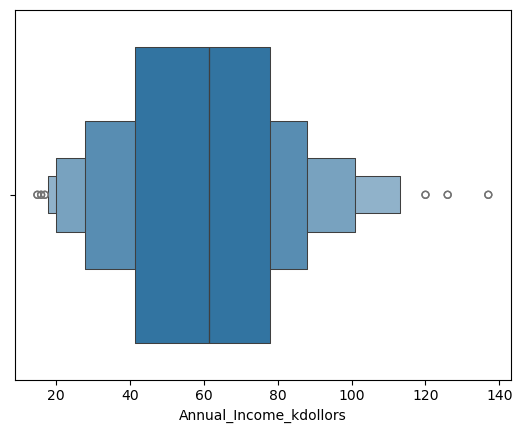

In [7]:
sns.boxenplot(x = df['Annual_Income_kdollors'])

<Axes: xlabel='Annual_Income_kdollors'>

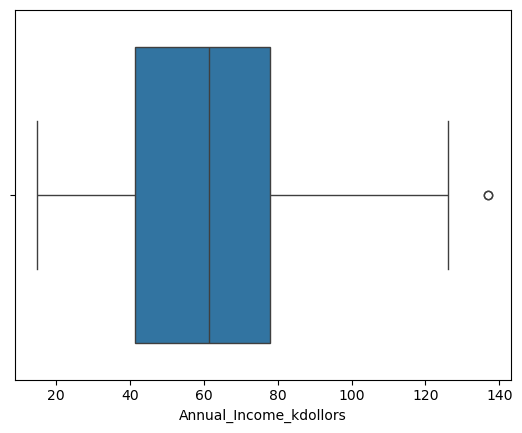

In [8]:
sns.boxplot(x = df['Annual_Income_kdollors'])

In [9]:
max_limit = df['Annual_Income_kdollors'].quantile(0.99)
max_limit

126.1099999999999

In [10]:
min_limit = df['Annual_Income_kdollors'].quantile(0.01)
min_limit

15.99

In [11]:
df[(df['Annual_Income_kdollors'] >= max_limit.round(2)) | (df['Annual_Income_kdollors'] <= min_limit.round(2))]

,CustomerID,Gender,Age,Annual_Income_kdollors,Spending_Score_1-100
0,1,Male,19,15,39
1,2,Male,21,15,81
198,199,Male,32,137,18
199,200,Male,30,137,83


# Trimming outlier rows:

In [12]:
df = df.query('@min_limit < Annual_Income_kdollors < @max_limit')
df.head()

,CustomerID,Gender,Age,Annual_Income_kdollors,Spending_Score_1-100
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6


In [13]:
df.describe()

,CustomerID,Age,Annual_Income_kdollors,Spending_Score_1-100
count,196.00000,196.000000,196.000000,196.000000
mean,100.50000,39.122449,60.244898,50.096939
std,56.72448,13.955802,24.953315,25.771696
min,3.00000,18.000000,16.000000,1.000000
25%,51.75000,29.000000,42.000000,34.750000
50%,100.50000,36.000000,61.500000,50.000000
75%,149.25000,49.000000,78.000000,72.250000
max,198.00000,70.000000,126.000000,99.000000


<Axes: xlabel='Annual_Income_kdollors'>

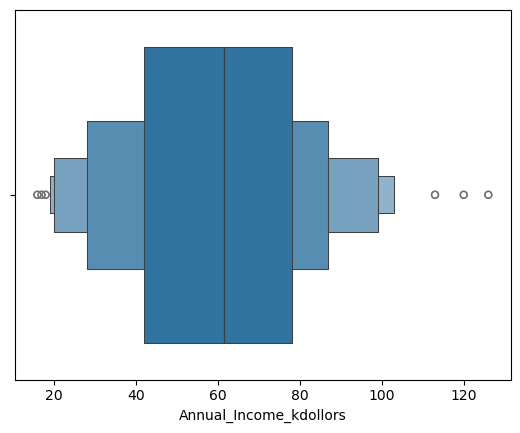

In [14]:
sns.boxenplot(x = df['Annual_Income_kdollors'])

<Axes: xlabel='Annual_Income_kdollors'>

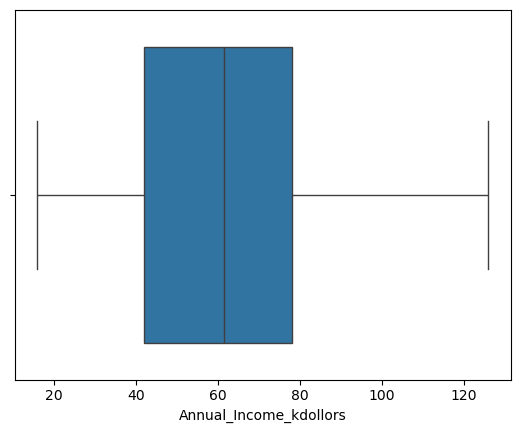

In [15]:
sns.boxplot(x = df['Annual_Income_kdollors'])

# Capping outlier rows:

In [16]:
copy_df['Annual_Income_kdollors'] = copy_df['Annual_Income_kdollors'].clip(lower= min_limit, upper= max_limit)

In [17]:
copy_df.describe()

,CustomerID,Age,Annual_Income_kdollors,Spending_Score_1-100
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.461000,50.200000
std,57.879185,13.969007,25.949731,25.823522
min,1.000000,18.000000,15.990000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,126.110000,99.000000


<Axes: xlabel='Annual_Income_kdollors'>

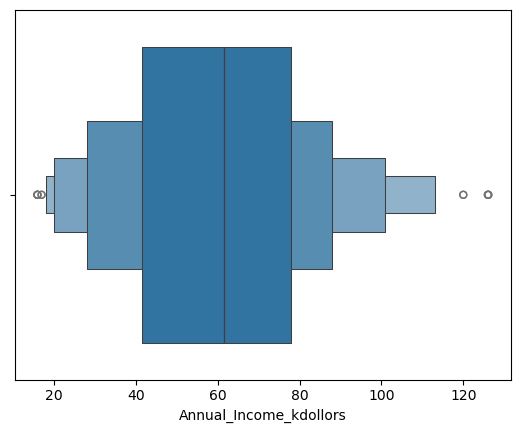

In [18]:
sns.boxenplot(x = copy_df['Annual_Income_kdollors'])

<Axes: xlabel='Annual_Income_kdollors'>

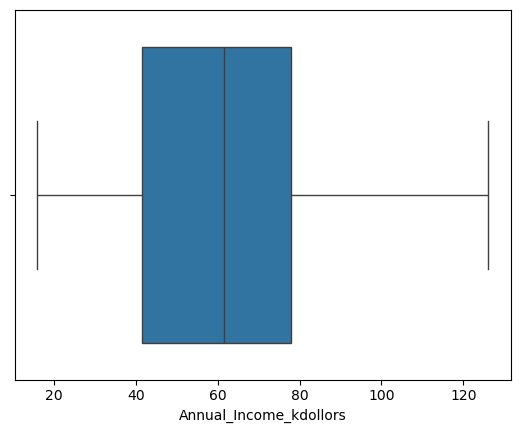

In [19]:
sns.boxplot(x = copy_df['Annual_Income_kdollors'])